Data processing

In [1]:
import pandas as pd


# Function to load and clean data
def load_and_clean_data(file_path):
    # Load data from CSV file
    df = pd.read_csv(file_path)
    print(df.head(10))

    # Data processing and cleaning
    fltrdf = df[
        (df["Event distance/length"].isin(["50km", "50mi", "100km", "100mi"]))
        & (df["Year of event"] == 2018)
    ]

    print(fltrdf.head(10))

    # Extract race name and clean up
    fltrdf["Event name"] = fltrdf["Event name"].str.split("(").str.get(0).str.strip()

    # Calculate athlete age
    if "Athlete year of birth" in df.columns:
        fltrdf["athlete_age"] = 2018 - fltrdf["Athlete year of birth"]

    # Drop unnecessary columns
    fltrdf = fltrdf.drop(
        [
            "Athlete club",
            "Athlete country",
            "Athlete year of birth",
            "Athlete age category",
        ],
        axis=1,
    )

    fltrdf = fltrdf.dropna()
    fltrdf = fltrdf.reset_index(drop=True)

    # Ensure correct data types
    fltrdf["athlete_age"] = fltrdf["athlete_age"].astype(int)
    fltrdf["Athlete average speed"] = fltrdf["Athlete average speed"].astype(float)

    # Rename columns for consistency
    fltrdf = fltrdf.rename(
        columns={
            "Year of event": "year",
            "Event dates": "race_day",
            "Event name": "race_name",
            "Event distance/length": "race_length",
            "Event number of finishers": "race_number_of_finishers",
            "Athlete performance": "athlete_performance",
            "Athlete gender": "athlete_gender",
            "Athlete average speed": "athlete_average_speed",
            "Athlete ID": "athlete_id",
        }
    )

    # Select relevant columns
    fltrdf2 = fltrdf[
        [
            "race_day",
            "race_name",
            "race_length",
            "race_number_of_finishers",
            "athlete_id",
            "athlete_gender",
            "athlete_age",
            "athlete_performance",
            "athlete_average_speed",
        ]
    ]
    fltrdf2 = fltrdf2[fltrdf2["athlete_gender"] != "X"]
    return fltrdf2


Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Function to plot histogram
def plot_histogram(data, column, title, xlabel, ylabel, bins=20):
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


# Function to plot histogram by gender
def plot_histogram_by_gender(data, column, title, xlabel, ylabel, bins=20):
    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=column, hue="athlete_gender", bins=bins, multiple="stack")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


# Function to plot average speed distribution
def plot_average_speed_distribution(data, distances):
    plt.figure(figsize=(14, 10))
    for i, distance in enumerate(distances, start=1):
        plt.subplot(2, 2, i)
        sns.histplot(
            data[data["race_length"] == distance]["athlete_average_speed"],
            bins=20,
            kde=True,
        )
        plt.title(f"Average Speed Distribution for {distance}")
        plt.xlabel("Average Speed (km/h)")
        plt.ylabel("Number of Athletes")
        plt.grid(True)
    plt.tight_layout()
    plt.show()


# Function to plot violin plot
def plot_violin(data):
    plt.figure(figsize=(10, 5))
    sns.violinplot(
        data=data,
        x="race_length",
        y="athlete_average_speed",
        hue="athlete_gender",
        split=True,
        inner="quart",
        linewidth=1,
    )
    plt.title("Average Speed by Race Length and Gender")
    plt.xlabel("Race Length")
    plt.ylabel("Average Speed (km/h)")
    plt.grid(True)
    plt.show()


# Function to plot linear regression
def plot_linear_regression(data):
    sns.lmplot(
        data=data,
        x="athlete_age",
        y="athlete_average_speed",
        hue="athlete_gender",
        height=5,
        aspect=2,
    )
    plt.title("Average Speed vs. Athlete Age by Gender")
    plt.xlabel("Athlete Age")
    plt.ylabel("Average Speed (km/h)")
    plt.grid(True)
    plt.show()


# Function to plot average speed by season
def plot_average_speed_by_season(data):
    plt.figure(figsize=(12, 6))
    mean_speeds = (
        data.query('race_length == "50mi"')
        .groupby("race_season")["athlete_average_speed"]
        .mean()
        .reset_index()
    )
    sns.barplot(data=mean_speeds, x="race_season", y="athlete_average_speed")
    plt.title("Average Speed in Season for 50mi Races")
    plt.xlabel("Season")
    plt.ylabel("Average Speed (km/h)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


# Function to plot runners count by age group
def plot_runners_count_by_age_group(data):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x="Age Group", y="Number of Runners")
    plt.title("Number of Runners Below and Above 50 Years Old")
    plt.xlabel("Age Group")
    plt.ylabel("Number of Runners")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


Main

   Year of event     Event dates                                 Event name   
0           2015      17.10.2015     Taturs Pumpkin Holler 50 Km Race (USA)  \
1           2016  05.-06.03.2016                 Little Edo Oedo 200k (JPN)   
2           2019  20.-21.07.2019      Gran Trail Aneto-Posets 105 kms (ESP)   
3           2012      07.01.2012  Run4RKids 6 hours Indoor Track Race (CAN)   
4           2019      28.09.2019                     Bettona Crossing (ITA)   
5           2009      24.05.2009         Comrades Marathon - Down Run (RSA)   
6           2021      18.07.2021        Golden Ring 50 Km Ultra Trail (RUS)   
7           1996      28.09.1996                 Les 100 km de Millau (FRA)   
8           2014      09.08.2014          Howl at the Moon 8 Hour Run (USA)   
9           2014      12.04.2014             Les 6 heures de Gravigny (FRA)   

  Event distance/length  Event number of finishers Athlete performance   
0                  50km                         90      

c:\Users\Kuba\Desktop\solvro\dt\pro.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrdf["Event name"] = fltrdf["Event name"].str.split("(").str.get(0).str.strip()
c:\Users\Kuba\Desktop\solvro\dt\pro.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrdf["athlete_age"] = 2018 - fltrdf["Athlete year of birth"]


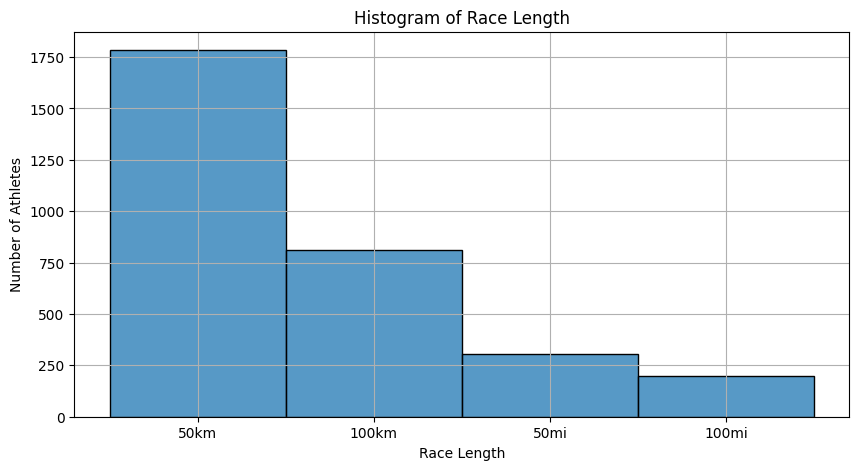

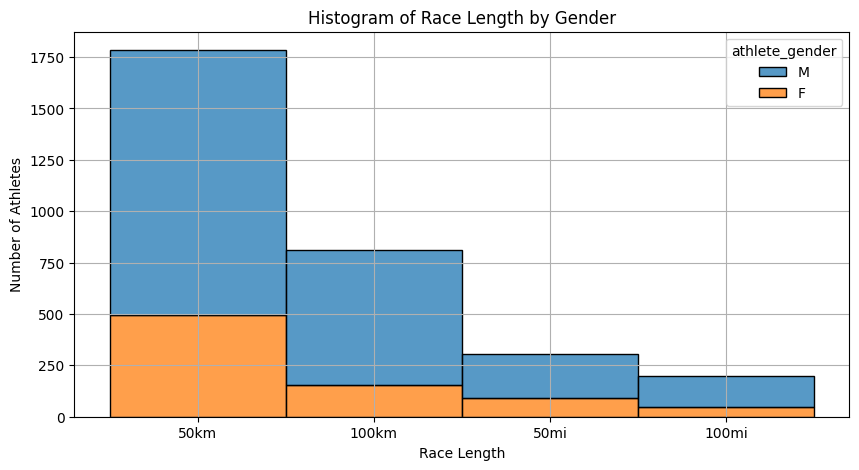

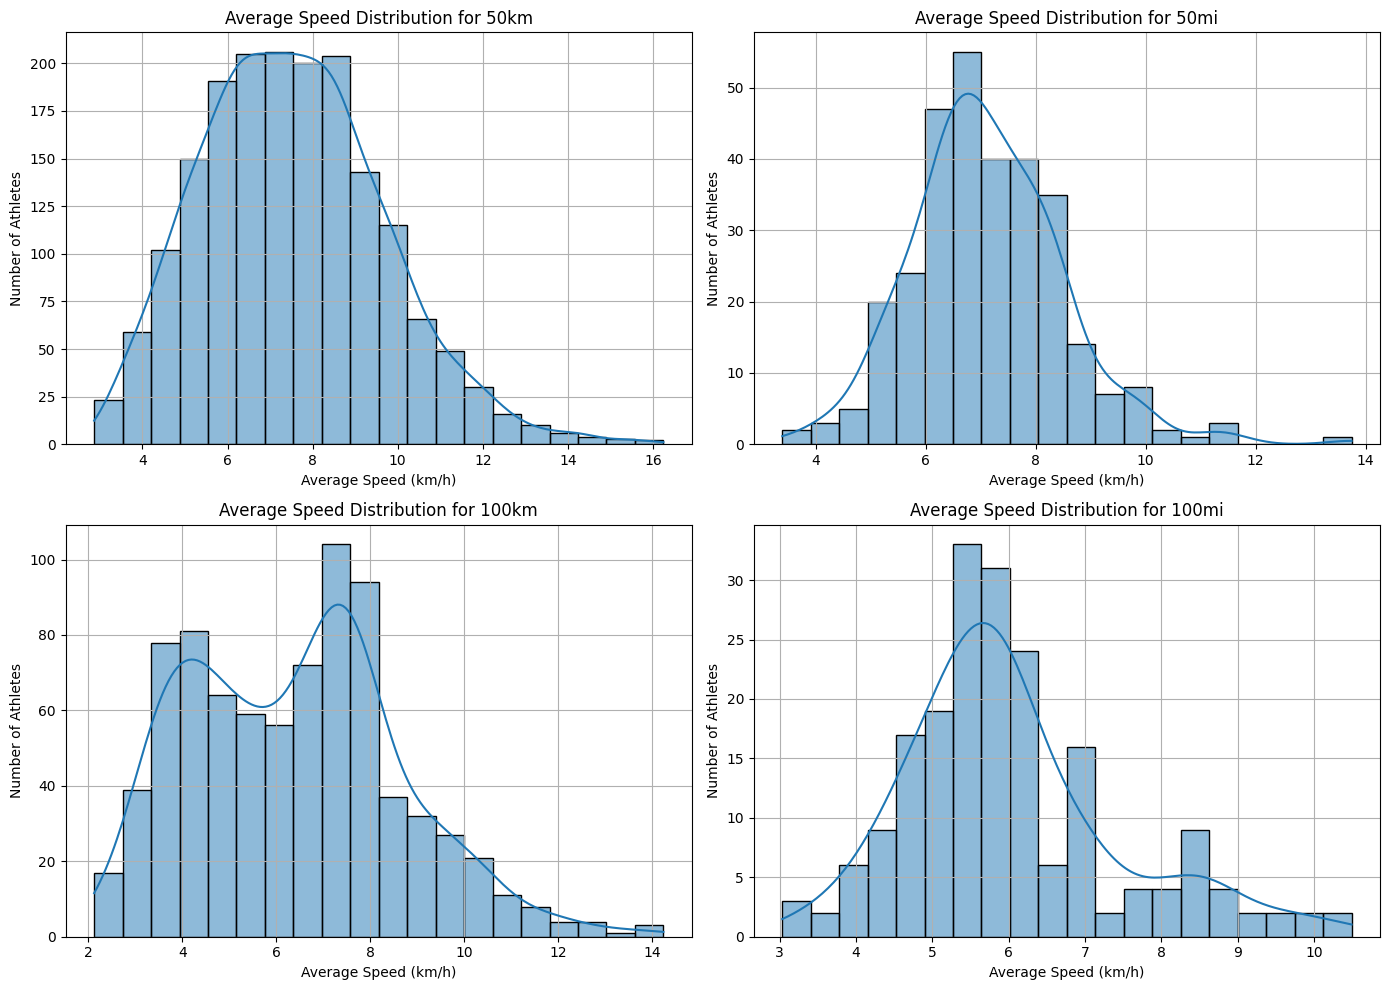

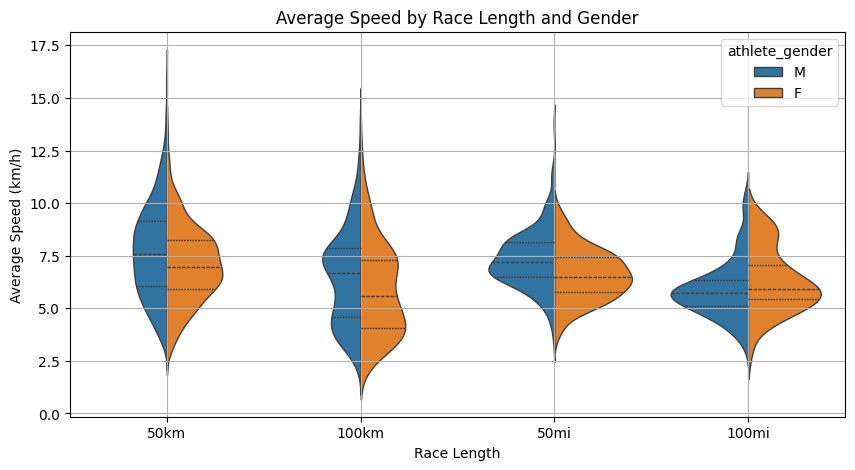

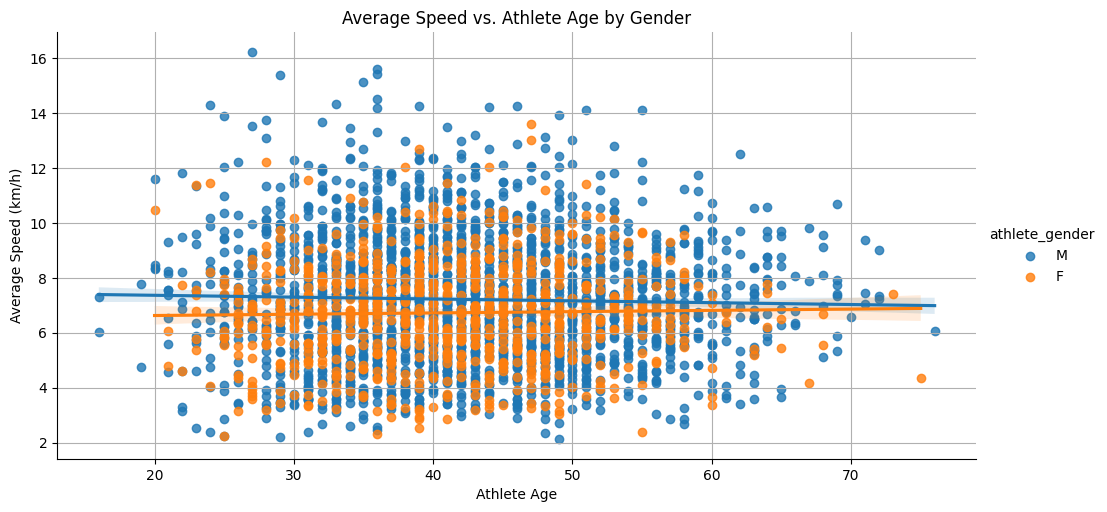

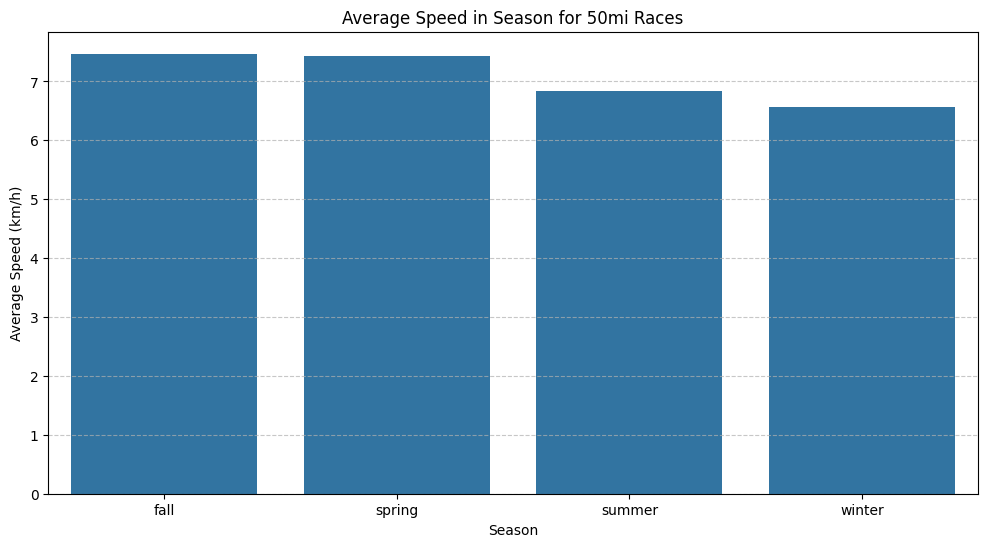

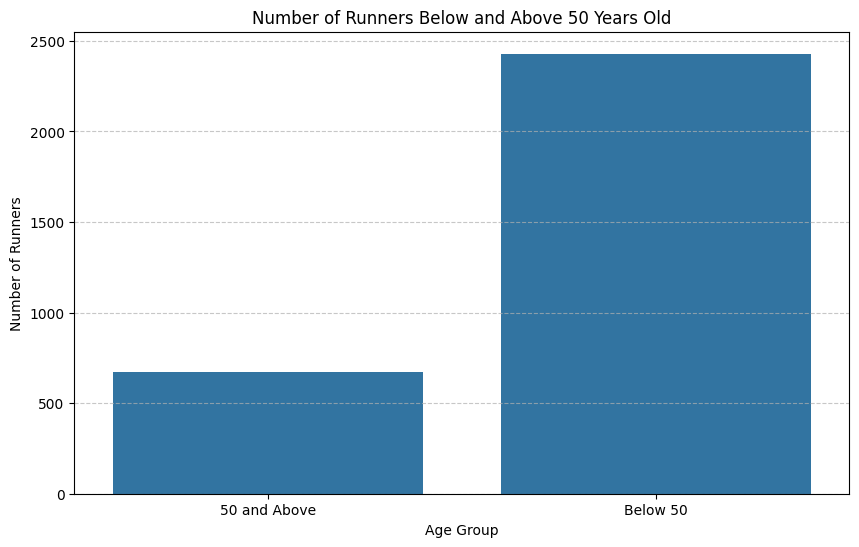

In [3]:
# main.py

from pro import load_and_clean_data
from vis import (
    plot_histogram,
    plot_histogram_by_gender,
    plot_average_speed_distribution,
    plot_violin,
    plot_linear_regression,
    plot_average_speed_by_season,
    plot_runners_count_by_age_group,
)
import pandas as pd

# Load and process the data
file_path = "newmaraton.csv"  # Update file path to newmaraton.csv
fltrdf2 = load_and_clean_data(file_path)

# Visualizations
plot_histogram(
    fltrdf2,
    "race_length",
    "Histogram of Race Length",
    "Race Length",
    "Number of Athletes",
)
plot_histogram_by_gender(
    fltrdf2,
    "race_length",
    "Histogram of Race Length by Gender",
    "Race Length",
    "Number of Athletes",
)
plot_average_speed_distribution(fltrdf2, ["50km", "50mi", "100km", "100mi"])
plot_violin(fltrdf2)
plot_linear_regression(fltrdf2)

# Add race month and season
fltrdf2["race_month"] = fltrdf2["race_day"].str.split(".").str.get(1).astype(int)
fltrdf2["race_season"] = fltrdf2["race_month"].apply(
    lambda x: (
        "winter"
        if x == 12 or x <= 2
        else (
            "spring"
            if 3 <= x <= 5
            else "summer" if 6 <= x <= 8 else "fall" if 9 <= x <= 11 else "unknown"
        )
    )
)

# Visualizations: average speeds in season for 50 mi races
plot_average_speed_by_season(fltrdf2)

# Visualization: number of runners below and above 50 years old
age_counts = fltrdf2.copy()
age_counts["Age Group"] = age_counts["athlete_age"].apply(
    lambda x: "Below 50" if x < 50 else "50 and Above"
)
age_counts = (
    age_counts.groupby("Age Group").size().reset_index(name="Number of Runners")
)
plot_runners_count_by_age_group(age_counts)
